# Shop Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv('customers.csv', index_col=0)

# Análisis Exploratorio de Datos

In [3]:
customers.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [4]:
customers.shape

(2000, 7)

El conjunto de datos está formado por 2000 observaciones y 8 características.

- CustomerID: ID del cliente.
- Gender: Género.
- Age: Edad en años.
- Annual Income: Ingresos anuales en dólares.
- Spending Score (1-100): Puntuación asignada por la tienda, basada en el comportamiento del cliente y la naturaleza del gasto.
- Profession: Profesión.
- Work Experience: Experiencia laboral en años.
- Family Size: Tamaño familia.

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [6]:
customers.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
customers.isna().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
customers_14= customers[customers['Age']<=14]

In [9]:
customers_14

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
211,Female,1,57000,93,Engineer,1,2
212,Female,0,22000,92,Artist,2,1
229,Male,0,33000,64,Marketing,1,1
231,Female,6,93000,53,Lawyer,8,2
235,Female,4,84000,54,Artist,9,1
...,...,...,...,...,...,...,...
1975,Female,14,153145,59,Healthcare,8,6
1980,Male,0,165321,93,Doctor,8,1
1981,Female,10,86925,76,Artist,7,2


In [10]:
customers_14['Profession'].value_counts()

Profession
Artist           78
Healthcare       44
Entertainment    33
Doctor           32
Lawyer           23
Executive        23
Engineer         16
Marketing        13
Homemaker         8
Name: count, dtype: int64

In [11]:
customers_14['Work Experience'].value_counts()

Work Experience
1     68
0     52
8     30
9     25
6     19
7     17
4     12
10    10
2      9
5      9
3      7
13     5
14     4
15     3
12     2
11     2
Name: count, dtype: int64

In [12]:
customers['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [13]:
customers[customers['Profession'].isnull()]

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
80,Female,49,98000,42,NaN,1,1
119,Female,51,84000,43,NaN,2,7
220,Female,59,76000,61,NaN,9,1
238,Male,95,36000,35,NaN,0,4
438,Male,76,136259,14,NaN,0,7
441,Female,0,57373,29,NaN,0,7
499,Male,95,121725,3,NaN,12,3
546,Female,89,107359,26,NaN,10,6
602,Male,61,126370,20,NaN,11,4


In [14]:
set(customers['Profession'].values)

{'Artist',
 'Doctor',
 'Engineer',
 'Entertainment',
 'Executive',
 'Healthcare',
 'Homemaker',
 'Lawyer',
 'Marketing',
 nan}

En la variable Profession hemos encontramos 35 valores perdidos. Sin embargo al observar la frecuencia de cada profesión para menores de 14 años, encontramos que tienen asignado un trabajo. Con la experiencia laboral también se observa el mismo error, además de clientes que tienen más experiencia laboral que años.

Entonces para los menores de 14 años vamos a cambiar el valor dado por 'Child', excepto para las profesiones 'Artist' y 'Entertainment'. Los NaN vamos a cambiarlos por la moda. Y la experiencia laboral para aquellos cuyo valor sea mayor que su edad se asignará el valor de 0.

In [15]:
customers_df=customers.copy()

In [16]:
(customers_df['Age'] < customers_df['Work Experience']).sum()

81

In [17]:
customers_df['Profession'].fillna('Artist', inplace=True)

In [18]:
customers_df['Profession']=np.where(((customers_df['Age']<=14) & (customers_df['Profession']!='Artist') & (customers_df['Profession']!='Entertainment')), 'Child', customers_df['Profession'])

In [19]:
customers_14= customers_df[customers_df['Age']<=14]

In [20]:
(customers_14['Age'] < customers_14['Work Experience']).sum()

81

In [21]:
customers_14['Profession'].value_counts()

Profession
Child            159
Artist            82
Entertainment     33
Name: count, dtype: int64

In [22]:
customers_df['Work Experience']=np.where(((customers_df['Profession']=='Child') | (customers_df['Age'] < customers_df['Work Experience'])), 0, customers_df['Work Experience'])

In [23]:
customers_14= customers_df[customers_df['Age']<=14]

In [24]:
customers_14

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
211,Female,1,57000,93,Child,0,2
212,Female,0,22000,92,Artist,0,1
229,Male,0,33000,64,Child,0,1
231,Female,6,93000,53,Child,0,2
235,Female,4,84000,54,Artist,0,1
...,...,...,...,...,...,...,...
1975,Female,14,153145,59,Child,0,6
1980,Male,0,165321,93,Child,0,1
1981,Female,10,86925,76,Artist,7,2


In [25]:
customers_df.isna().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [26]:
(customers_df['Age'] < customers_df['Work Experience']).sum()

0

In [27]:
set(customers_df['Profession'].values)

{'Artist',
 'Child',
 'Doctor',
 'Engineer',
 'Entertainment',
 'Executive',
 'Healthcare',
 'Homemaker',
 'Lawyer',
 'Marketing'}

Ahora que están tratados todos los errores. Vamos a analizar cada una de las variables.

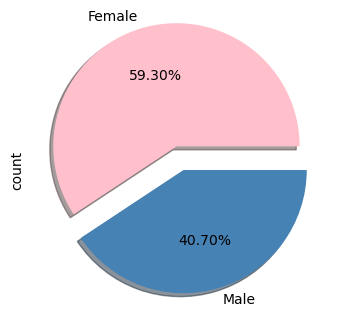

In [28]:
plot=customers_df['Gender'].value_counts().plot(kind='pie', 
                                                    figsize=(4,4), 
                                                    autopct='%1.2f%%',
                                                   colors=['Pink', 'SteelBlue'],
                                                   shadow=True,
                                               explode =(0.2, 0))

En el gráfico superior observamos que el 59.30% de los clientes son mujeres.

fig, ax= plt.subplots(3,2, figsize=(14,20))
ax=ax.flatten()
sns.histplot(customers_df['Age'], kde=True, ax=ax[0])
sns.histplot(customers_df['Annual Income ($)'], kde=True, ax=ax[1])
sns.histplot(customers_df['Spending Score (1-100)'], kde=True, ax=ax[2])
sns.histplot(customers_df['Profession'], kde=True, ax=ax[3])
ax[3].tick_params(labelrotation=45)
sns.histplot(customers_df['Work Experience'], kde=True, ax=ax[4])
sns.histplot(customers_df['Family Size'], kde=True, ax=ax[5])
plt.show()

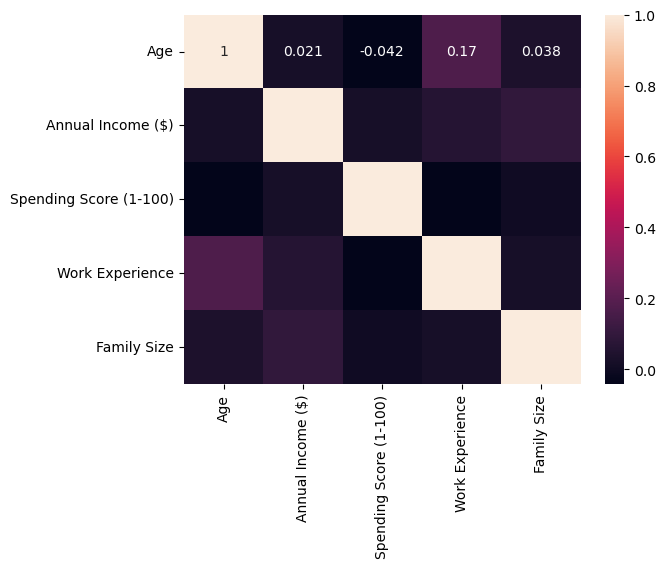

In [29]:
sns.heatmap(customers_df.corr(numeric_only=True), annot=True)
plt.show()

Al observar la amtriz de correlación vemos que la mayor correlación la encontramos entre la edad y los años de experiencia (correlación positiva de 0.17), aunque no es muy alta.

# Preprocessing

Antes de usar el modelo de machine learning hay que convertir las variables objeto en categóricas y estandarizar las características. Para ello vamos a utilizar LaberlEncoder y StandardScaler, respectivamente.

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [31]:
encoder=LabelEncoder()
customers_df['Gender']=encoder.fit_transform(customers_df['Gender'])
customers_df['Profession']=encoder.fit_transform(customers_df['Profession'])

In [32]:
encoder.classes_

array(['Artist', 'Child', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'],
      dtype=object)

In [33]:
customers_df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,1,19,15000,39,6,1,4
2,1,21,35000,81,3,3,3
3,0,20,86000,6,3,1,1
4,0,23,59000,77,8,0,2
5,0,31,38000,40,4,2,6


In [34]:
scaler=StandardScaler()
customers_scaled=pd.DataFrame(scaler.fit_transform(customers_df), columns=customers_df.columns)

In [35]:
customers_scaled.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1.207064,-1.054089,-2.093501,-0.428339,1.009093,-0.675899,0.117497
1,1.207064,-0.983723,-1.656133,1.075546,-0.039497,-0.159453,-0.390051
2,-0.828457,-1.018906,-0.540845,-1.609962,-0.039497,-0.675899,-1.405148
3,-0.828457,-0.913356,-1.131292,0.932319,1.708153,-0.934122,-0.897599
4,-0.828457,-0.631891,-1.590528,-0.392532,0.310033,-0.417676,1.132594


# Principal Component Analysis

Lo primero que vamos a hacer es aplicar una reducción de dimensión.

In [36]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(customers_scaled)

PCA()

In [37]:
features=range(pca.n_components_)
print(features)

range(0, 7)


In [38]:
pca.explained_variance_ratio_

array([0.18602485, 0.15666427, 0.1429423 , 0.13908864, 0.1358098 ,
       0.12506924, 0.11440089])

Text(0, 0.5, 'Cumulative Explained Variance')

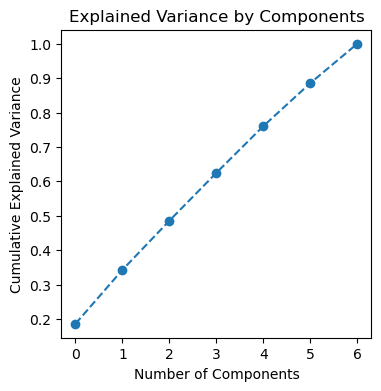

In [39]:
plt.figure(figsize=(4,4))
plt.plot(features, pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [40]:
pca=PCA(n_components=3)
pca.fit(customers_scaled)
pca.components_

array([[ 0.07434739,  0.608027  ,  0.17427437, -0.20884649,  0.46875117,
         0.53960116,  0.19972518],
       [ 0.00436689,  0.10161676, -0.68718324, -0.33526936,  0.27022569,
        -0.04505375, -0.57443612],
       [ 0.96861574, -0.04767205,  0.00469855,  0.18834089, -0.02991675,
         0.06797142, -0.13601995]])

Hemos reducido nuestras características a 3 componentes de 7 que había. 

In [41]:
df_pca_comp= pd.DataFrame(data=pca.components_,
                         columns= customers_df.columns,
                          index=['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
Component 1,0.074347,0.608027,0.174274,-0.208846,0.468751,0.539601,0.199725
Component 2,0.004367,0.101617,-0.687183,-0.335269,0.270226,-0.045054,-0.574436
Component 3,0.968616,-0.047672,0.004699,0.188341,-0.029917,0.067971,-0.136020


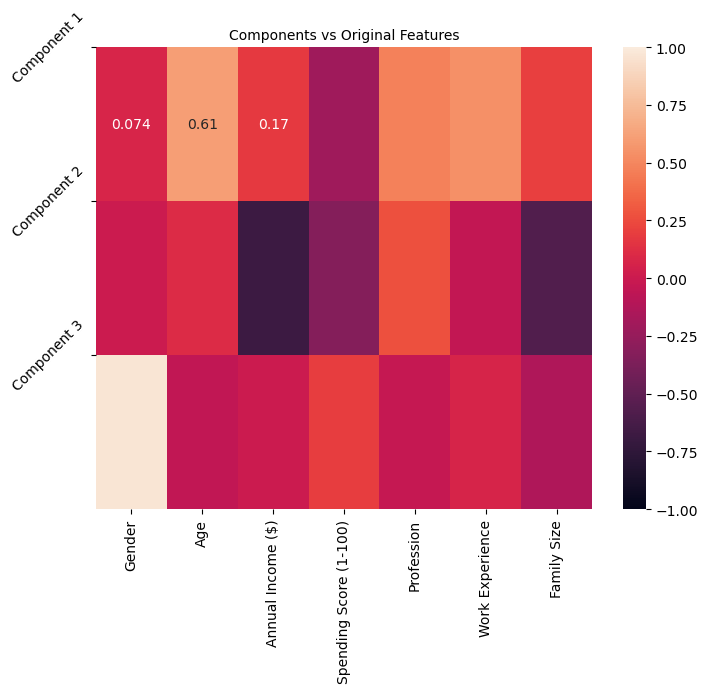

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           annot= True)
plt.yticks([0, 1, 2],
          ['Component 1', 'Component 2', 'Component 3'],rotation=45)
plt.title('Components vs Original Features', fontsize= 10)
plt.show()

Vemos que hay una correlación positiva entre el Componente 1 y 'Edad', 'Profession' y 'Work Experience'. Este componente muestra la orientación profesional del cliente. 

El Componente 2 tiene una correlación negativa con 'Annual Income ($)', 'Spending Score (1-100)' y 'Family Size'. Este componente muestra el dinero disponible del cliente.

Finalmente, el Componente 3 tiene una correlación positiva de casi 1 con el género.

In [43]:
pca.transform(customers_scaled)
scores_pca= pca.transform(customers_scaled)
scores_pca

array([[-0.69479423,  1.71602546,  1.03680871],
       [-1.20409168,  0.90334788,  1.45426282],
       [-1.10300988,  1.63122116, -0.9132779 ],
       ...,
       [ 2.14829272,  1.60778817,  1.04045095],
       [ 1.91400705,  0.25116613,  0.97450337],
       [ 1.11815048,  0.72468155,  1.24441199]])

# K-Means

Antes de utilizar el algoritmo K-Means necesitamos elegir el número de clusters. Para ello vamos a utilizar la suma de cuadrados de conglomerados internos (wcss) y el Elbow Method.

In [44]:
from sklearn.cluster import KMeans

In [45]:
wcss=[]
for k in range(1, 11):
    kmeans_pca=KMeans(n_clusters=k, init='k-means++', n_init='auto',
                     random_state=4)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

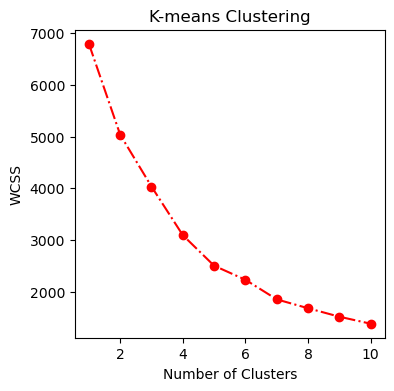

In [46]:
plt.figure(figsize = (4,4))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Vamos a utlizar 3 clusters.

In [47]:
kmeans_pca=KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=4)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, n_init='auto', random_state=4)

In [48]:
df_segm_pca_kmeans = pd.concat([customers_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Component 1,Component 2,Component 3,Segment K-means PCA
0,1,19,15000,39,6,1,4,-0.694794,1.716025,1.036809,1
1,1,21,35000,81,3,3,3,-1.204092,0.903348,1.454263,0
2,0,20,86000,6,3,1,1,-1.103010,1.631221,-0.913278,1
3,0,23,59000,77,8,0,2,-0.891433,1.387683,-0.581141,1
4,0,31,38000,40,4,2,6,-0.494852,0.608753,-1.045456,1


In [49]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.389062,25.198438,108430.618750,60.776562,1.184375,1.295313,3.526562,-1.257275,-0.252956,0.066548
1,0.494845,58.022091,83055.730486,39.580265,4.525773,4.154639,2.701031,0.384901,1.024143,0.146745
2,0.336270,62.255507,140489.289280,53.088106,3.516887,5.264317,5.060206,0.797809,-0.783408,-0.208855


En la tabla de arriba vemos nuestros datos agrupados por Segmentos K-Means.

El primer segmento está formado por clientes con una edad media de unos 25 años, siendo el segmento más joven. Es el segmento en el que el ratio de gasto es superior. Este primer segmento lo vamos a etiquetar como clientes promedio.

El segundo segmento está formado por clientes con menos ingresos anuales que en los otrs dos segmentos. Está formado por casi el mismo número de mujeres que de hombres. Es el segmento en el que el ratio de gasto es menor, así como el tamaño familiar. Este segmento lo vamos a etiquetar como clientes con menos oportunidades.

El tercer segmento está formado por más mujeres que hombres y es el segmento con valores más altos de ingresos anuales, así como experiencia laboral y tamaño familiar. Este último segmento los vamos a etiquetar como clientes bien pagados.

In [50]:
df_segm_pca_kmeans_freq['N Obs']= df_segm_pca_kmeans[['Segment K-means PCA', 'Gender']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs']=df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq= df_segm_pca_kmeans_freq.rename({0: 'standard',
                                                        1: 'fewer opportunities',
                                                        2: 'well-off'})
df_segm_pca_kmeans_freq

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.389062,25.198438,108430.618750,60.776562,1.184375,1.295313,3.526562,-1.257275,-0.252956,0.066548,640,0.3200
fewer opportunities,0.494845,58.022091,83055.730486,39.580265,4.525773,4.154639,2.701031,0.384901,1.024143,0.146745,679,0.3395
well-off,0.336270,62.255507,140489.289280,53.088106,3.516887,5.264317,5.060206,0.797809,-0.783408,-0.208855,681,0.3405


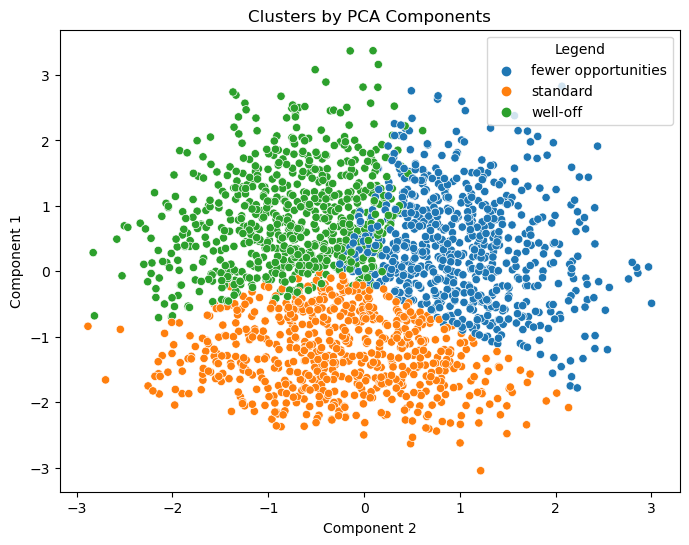

In [51]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'standard',
                                                        1: 'fewer opportunities',
                                                        2: 'well-off'})
plt.figure(figsize = (8, 6))
sns.scatterplot(x=df_segm_pca_kmeans['Component 2'], y=df_segm_pca_kmeans['Component 1'], hue = df_segm_pca_kmeans['Legend'])
plt.title('Clusters by PCA Components')
plt.show()

En el gráfico superior podemos distinguir claramente los 3 tipos de segmentos.